<a href="https://colab.research.google.com/github/hooymana/ASNR_2025_DataScience/blob/main/script_randomForest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section takes about 10 minutes to load.<br>
Hit play button for this chunk to have it run in the background while Lei presents.

In [1]:
#machine learning packages
install.packages("randomForest")
install.packages("tidymodels")
#data manipulation packages
install.packages("dplyr")
install.packages("tidyverse")
#data importing packages
install.packages("curl")
#data visualization packages
install.packages("ggplot2")
install.packages("gghalves")
install.packages("ggExtra")

#running library() loads the installed packages into your connections memory.
library(tidyverse)
library(tidymodels)
library(dplyr)
library(randomForest)
library(curl)
library(ggplot2)
library(gghalves)
library(ggExtra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/u

**Reading in data from github using curl.** <br>
These data are read in from [this](https://github.com/hooymana/CSM_Data-Visualization_2025) repository. <br>
This way the file doesn't have to be downloaded from a repository and then uploaded into collab.

In [2]:
url <- "https://raw.githubusercontent.com/hooymana/ASNR_2025_DataScience/main/healthcare-dataset-stroke-data_ASNR.csv"
stroke_data <- read.csv(curl(url),
                 header=TRUE, stringsAsFactors = TRUE,
                 na.strings = c("", "N/A")) %>%
  mutate(stroke = factor(stroke, levels = c("0", "1")))

These data come from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) as part of a stroke prediction challenge.

**Attribute Information** <br>
>1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient <br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
6) ever_married: "No" or "Yes" <br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
8) Residence_type: "Rural" or "Urban" <br>
9) avg_glucose_level: average glucose level in blood <br>
10) bmi: body mass index <br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* <br>
12) stroke: 1 if the patient had a stroke or 0 if not <br>

In [3]:
head(stroke_data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NA,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
str(stroke_data)

'data.frame':	5109 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 2 levels "Female","Male": 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : num  36.6 NA 32.5 34.4 24 29 27.4 22.8 NA 24.2 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


**Only 4.9% (249/5109) of the participants in these data have a stroke.**

In [5]:
summary(stroke_data$stroke)

0    1 
4860  249

**Let's do some visualizations of the data using GGplot.**<br>
This is rain cloud plot demonstrating the magnitude and distribution of age between people with and without stroke.

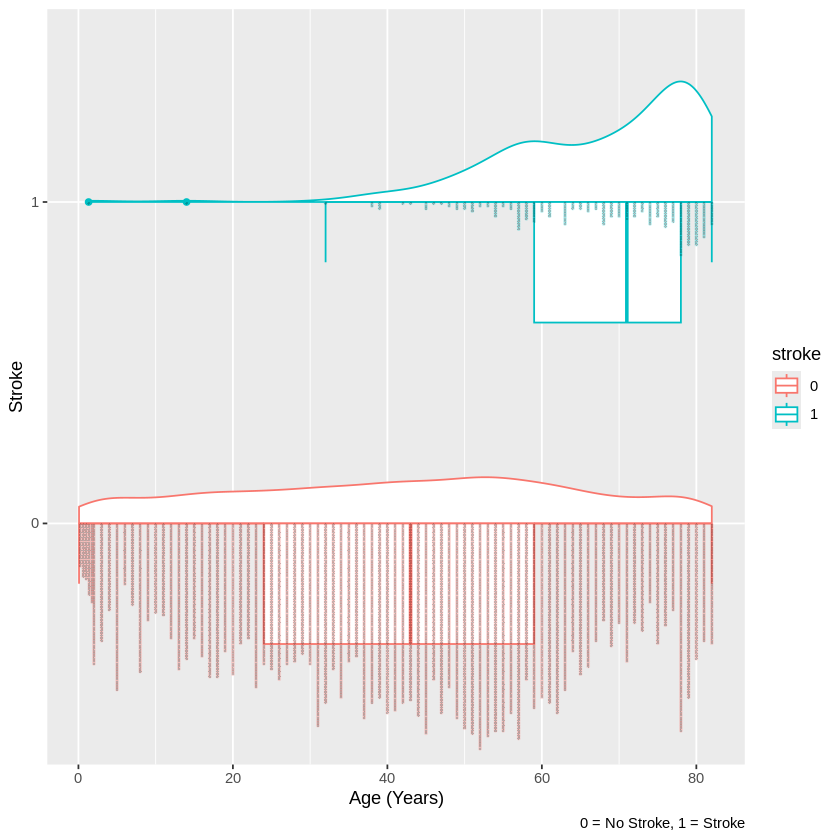

In [6]:
#Rain cloud plot
ggplot(stroke_data,aes(x=stroke,y=age,color=stroke))+
  #geom_half_boxplot(side="l",errorbar.length = 1)+
  geom_half_violin(side="r",show.legend = F)+
  geom_half_boxplot(side="l",show.legend = T)+
  geom_half_dotplot(stackdir = "down",binwidth=1/3,alpha=.25,show.legend = F)+
  xlab("Stroke")+
  ylab("Age (Years)")+
  labs(caption = "0 = No Stroke, 1 = Stroke")+
  coord_flip()

This is a scatter plot between age and average glucose among people with and without stroke.<br>
The trends in this plot represent the linear fit between age and glucose for people with and without stroke.


Call:
lm(formula = avg_glucose_level ~ age * stroke, data = stroke_data)

Residuals:
   Min     1Q Median     3Q    Max 
-81.88 -28.91 -12.19  13.37 159.90 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.43168    1.34134  64.437   <2e-16 ***
age          0.43731    0.02822  15.495   <2e-16 ***
stroke1     10.21100   15.13802   0.675    0.500    
age:stroke1  0.09278    0.22063   0.421    0.674    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.86 on 5105 degrees of freedom
Multiple R-squared:  0.06259,	Adjusted R-squared:  0.06203 
F-statistic: 113.6 on 3 and 5105 DF,  p-value: < 2.2e-16


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


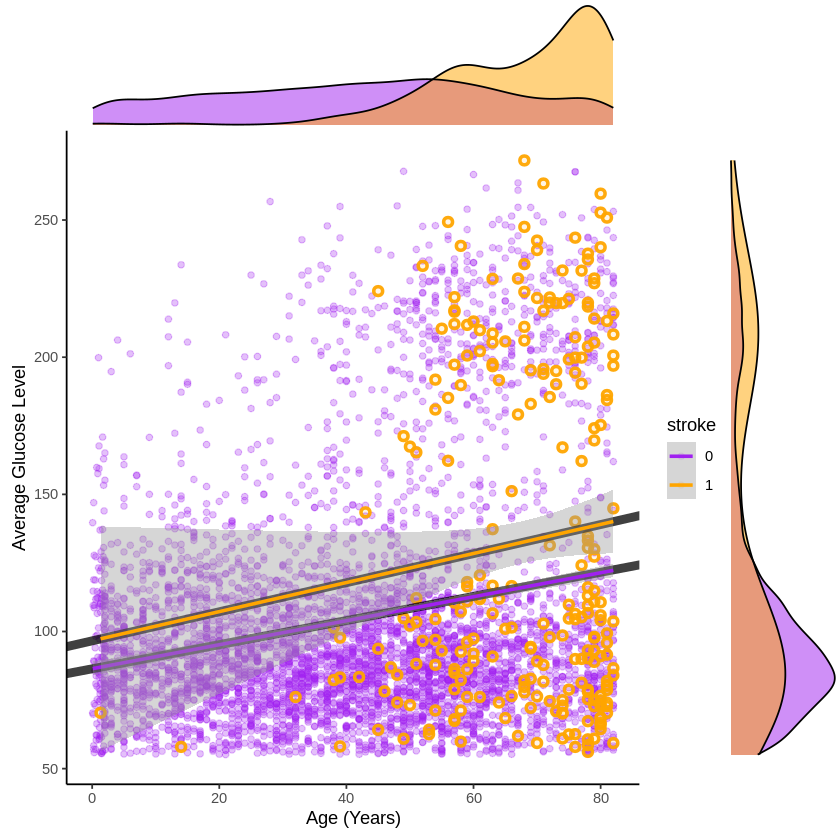

In [7]:
#Get the linear trends to get the intercepts and slopes for each group.
#Then we can map a black background line to provide contrast between the trends
# and the data.
summary(lm(avg_glucose_level~age*stroke,stroke_data))

a=ggplot(stroke_data,aes(x=age,y=avg_glucose_level,color=stroke))+
  geom_point(alpha=.1)+ #make invisible points so that ggmarginal works
  geom_point(data=stroke_data[stroke_data$stroke==0,],
mapping=aes(x=age,y=avg_glucose_level),
alpha=.2,color="purple")+ #create points specific to no stroke
    geom_point(data=stroke_data[stroke_data$stroke==1,],
mapping=aes(x=age,y=avg_glucose_level),
alpha=.95,shape=21,stroke=1.5,color="orange")+ #create bolder points specific to stroke
  geom_abline(intercept = 86.4,slope = .44,color="black",size=2.5,alpha=.75)+ #create contrast line for non-stroke
  geom_abline(intercept = 96.6,slope = .53,color="black",size=2.5,alpha=.75)+ #create contrast line for stroke
  geom_smooth(method = "lm",size=1)+ #create linear trends for each group (stroke and non-stroke)
  xlab("Age (Years)")+
  scale_color_manual(values = c("0" = "purple", "1" = "orange"))+ #customize color of trend lines
  theme_classic()+ #make background white
  ylab("Average Glucose Level")

ggMarginal(a,type = "density",groupFill = T) #add the density plots to the x and y axes


You can find more ways to plot in ggplot using this [github repo](https://github.com/hooymana/CSM_Data-Visualization_2025/tree/main).

**Our Research Question** <br>
Can we identify which variables are associated with having a stroke? <br>
<br>
Let's try logistic regression first (remember to remove id variable).

In [8]:
fit.all = glm(stroke~. -id,stroke_data,family = "binomial")
summary(fit.all)


Call:
glm(formula = stroke ~ . - id, family = "binomial", data = stroke_data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -7.359650   1.067322  -6.895 5.37e-12 ***
genderMale                  -0.014625   0.154382  -0.095 0.924525    
age                          0.073481   0.006347  11.578  < 2e-16 ***
hypertension                 0.524857   0.175023   2.999 0.002711 ** 
heart_disease                0.348763   0.207231   1.683 0.092381 .  
ever_marriedYes             -0.115175   0.247289  -0.466 0.641394    
work_typeGovt_job           -0.681655   1.114151  -0.612 0.540660    
work_typeNever_worked       -9.823495 308.741641  -0.032 0.974617    
work_typePrivate            -0.520849   1.100279  -0.473 0.635943    
work_typeSelf-employed      -0.945890   1.118910  -0.845 0.397906    
Residence_typeUrban          0.004514   0.149987   0.030 0.975990    
avg_glucose_level            0.004652   0.001294   3.595 0.000324 

**Let's make a table to check and interpret results**<br>
<br>
We will need to use the exp() function to convert the coefficients and confidence intervals to Odds Ratios (OR). <br>

OR > 1 represent variables that increase odds of stroke.<br>
OR < 1 represent variables that decrease odds of stroke.<br>
OR = 1 (non-significant) represent neither increase or decrease in odds of stroke.

In [9]:
coef.vec=round(exp(coef(fit.all)),3)
confint.table=suppressWarnings(round(exp(confint(fit.all)),3))

results.df=data.frame(OR = coef.vec,
lower.CI = confint.table[,1],
upper.CI = confint.table[,2],
p.value = round(coef(summary(fit.all))[,4],3))

results.df

Waiting for profiling to be done...



,OR,lower.CI,upper.CI,p.value
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.001,0.000,0.003,0.000
genderMale,0.985,0.727,1.332,0.925
age,1.076,1.063,1.090,0.000
hypertension,1.690,1.193,2.371,0.003
heart_disease,1.417,0.935,2.110,0.092
ever_marriedYes,0.891,0.559,1.481,0.641
work_typeGovt_job,0.506,0.081,9.918,0.541
work_typeNever_worked,0.000,0.000,0.000,0.975
work_typePrivate,0.594,0.098,11.481,0.636


Variables age, hypertension, and average glucose are statistically significant. <br>
<br>
But how well do they classify?<br>
Statistical significance is great but are these results meaningful?

In [10]:
# Predict on the data
stroke_pred <- ifelse(predict(fit.all, newdata = stroke_data, type = "response") > 0.5, 1, 0)

# Generate a confusion matrix using the training data
table(stroke_data$stroke,stroke_pred)

   stroke_pred
       0    1
  0 4698    1
  1  208    1

**Not very good.** <br>
<br>
It is important to remember that these results represent association and not prediction. To get closer to prediction we can perform **cross-validation**.<br>

I am going to create a training set and test set with an equal proportion of people with stroke in both.<br>

It is conventional to have the training data be 80% of the total data and the test data to be 20% of the total data. <br>

This is known as an 80/20 cross-validation split.

In [11]:
set.seed(123) # Set seed for reproducibility

# Split data into training and testing sets with stratification, the "prop" arguement splits the data into percent training and test we want.
stroke_split <- initial_split(stroke_data, prop = 0.8, strata = stroke)
stroke_train <- training(stroke_split)
stroke_test <- testing(stroke_split)

table(stroke_train$stroke)
table(stroke_test$stroke)


   0    1 
3895  192 


  0   1 
965  57 

**Now we will *train* our a model with the training data set.**<br>
This will generate a model that has coefficients specific to the training data, but is naive to the test data. <br>
**Then *test* that model on the test set**<br>
Classification accuracy of the trained model on the test set will tell us how well the model predicts *novel* data.

In [12]:
fit.train = glm(stroke~. -id,stroke_train,family = "binomial")

# Predict on the test set
stroke_pred_test <- ifelse(predict(fit.train, newdata = stroke_test, type = "response") > 0.5, 1, 0)

# Generate a confusion matrix between the predicted versus actual classes on the test set.
table(stroke_test$stroke,stroke_pred_test)

   stroke_pred_test
      0   1
  0 934   0
  1  49   1

Using Logistic Regression we do not achieve any meaningful level of prediction. <br>
What if we try a *Machine Learning* approach?

In [14]:
set.seed(123)
data_split <- initial_split(stroke_data, strata = stroke)
train_data <- training(data_split)
test_data <- testing(data_split)
summary(train_data$stroke)
summary(test_data$stroke)


0    1 
3646  185

0    1 
1214   64

In [15]:
stroke_recipe <- recipe(stroke ~ ., data = train_data%>%select(-id)) %>%
  step_impute_median(all_numeric_predictors()) %>%
  step_impute_mode(all_nominal_predictors()) %>%
  step_dummy(all_nominal_predictors()) %>%
  step_zv(all_predictors())

In [16]:
set.seed(234)
cv_folds <- vfold_cv(train_data, v = 5, strata = stroke)


rand_forest_spec <- rand_forest(
  mtry = tune(),
  min_n = tune(),
  trees = 1000 #May want to reduce this step to cut down on tunning time.
) %>%
  set_engine("randomForest") %>%
  set_mode("classification")


rf_workflow <- workflow() %>%
  add_model(rand_forest_spec) %>%
  add_recipe(stroke_recipe)

All steps above this are fast but this one is taking some time. Makes sense with model tuning. While this is running it may be fun to show how gemini can explain code.

In [17]:
set.seed(345)
rf_tune_results <- tune_grid(
  rf_workflow,
  resamples = cv_folds,
  grid = 50,
  metrics = metric_set(roc_auc, accuracy)
)

i Creating pre-processing data to finalize unknown parameter: mtry



In [18]:
rf_tune_results$.metrics
best_rf <- select_best(rf_tune_results, metric="roc_auc")

final_rf_workflow <- finalize_workflow(
  rf_workflow,
  best_rf
)

final_rf_fit <- fit(final_rf_workflow, data = train_data)



mtry,min_n,.metric,.estimator,.estimate,.config
<int>,<int>,<chr>,<chr>,<dbl>,<chr>
1,9,accuracy,binary,0.9465450,Preprocessor1_Model01
1,9,roc_auc,binary,0.7673688,Preprocessor1_Model01
1,13,accuracy,binary,0.9465450,Preprocessor1_Model02
1,13,roc_auc,binary,0.7157999,Preprocessor1_Model02
1,21,accuracy,binary,0.9465450,Preprocessor1_Model03
1,21,roc_auc,binary,0.7549049,Preprocessor1_Model03
1,29,accuracy,binary,0.9465450,Preprocessor1_Model04
1,29,roc_auc,binary,0.7083417,Preprocessor1_Model04
2,36,accuracy,binary,0.9465450,Preprocessor1_Model05


In [19]:
rf_fit_extracted <- extract_fit_parsnip(final_rf_fit)$fit

str(rf_fit_extracted)



List of 18
 $ call           : language randomForest(x = maybe_data_frame(x), y = y, ntree = ~1000, mtry = min_cols(~6L,      x), nodesize = min_rows(~9L, x))
 $ type           : chr "classification"
 $ predicted      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:3831] "1" "2" "3" "4" ...
 $ err.rate       : num [1:1000, 1:3] 0.0804 0.083 0.0779 0.0715 0.0688 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "OOB" "0" "1"
 $ confusion      : num [1:2, 1:3] 3.64e+03 1.85e+02 3.00 0.00 8.23e-04 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "0" "1"
  .. ..$ : chr [1:3] "0" "1" "class.error"
 $ votes          : 'matrix' num [1:3831, 1:2] 0.784 0.959 0.894 0.866 0.927 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3831] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "0" "1"
 $ oob.times      : num [1:3831] 370 370 385 359 383 360 358 381 357 366 ...
 $ classes        : chr [1:2] "0" "1"
 $ importance     :

In [20]:
importance_df <- as.data.frame(rf_fit_extracted$importance) %>%
  tibble::rownames_to_column("variable") %>%
  rename(importance = MeanDecreaseGini)

# Save variable importance data (optional)
#write.csv(var_imp, "variable_importance.csv", row.names = FALSE)

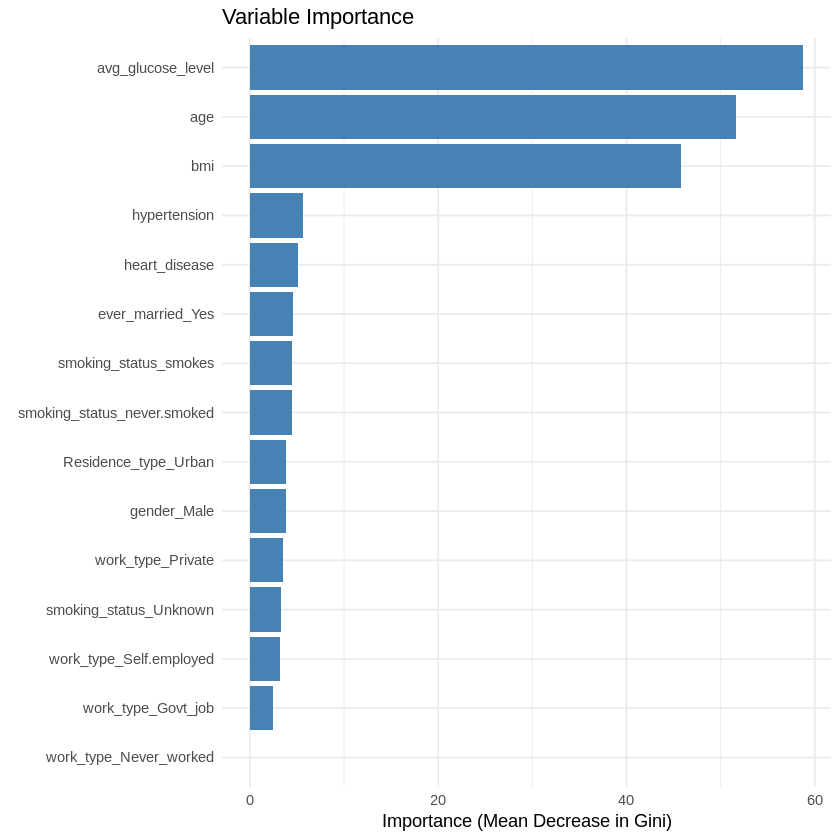

In [21]:
# Plot the variable importance metrics
importance_df %>%
  ggplot(aes(x = reorder(variable, importance), y = importance)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Variable Importance",
    x = NULL,
    y = "Importance (Mean Decrease in Gini)"
  ) +
  theme_minimal()

# save the plot (optional)
#ggsave("variable_importance_plot.png", width = 8, height = 6, dpi = 300)

# Model Performance on Test Data

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00600 0.03789 0.03700 0.55000 

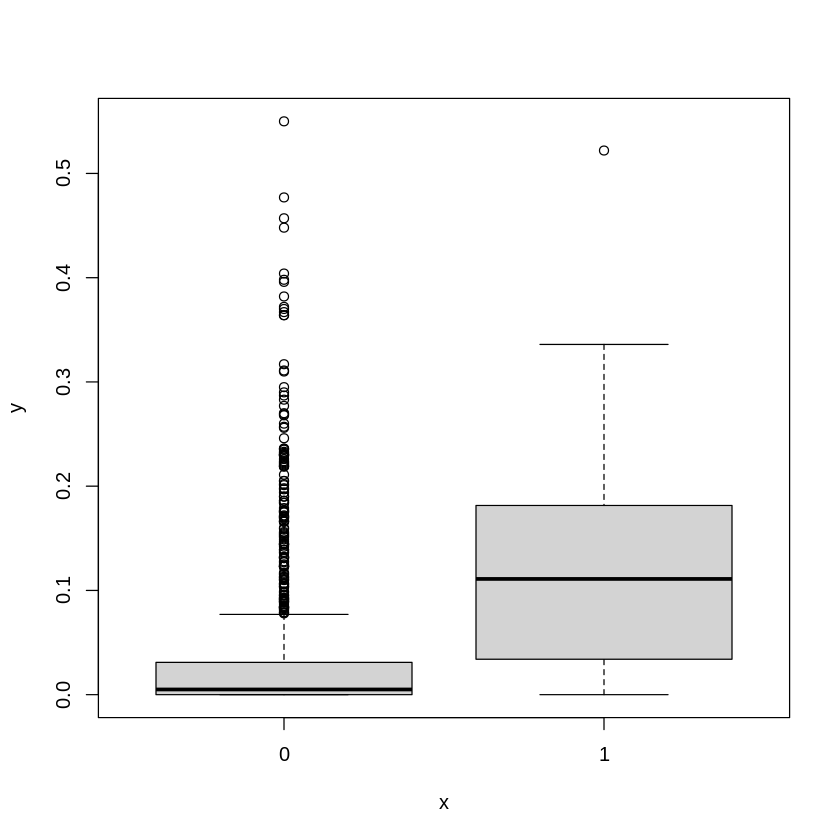

In [22]:
# Predict class probabilities and classes on test set
rf_preds <- predict(final_rf_fit, test_data, type = "prob") %>%
  bind_cols(predict(final_rf_fit, test_data, type = "class")) %>%
  bind_cols(test_data %>% select(stroke)) %>%
  rename(pred_class = .pred_class)

# Sanity check on coding probabilities
summary(rf_preds$.pred_1)

plot(rf_preds$stroke, rf_preds$.pred_1)

Due to a case imbalance, the model performs very well predicting no-one has a stroke. To solve this problem we can find the cut-point in p(stroke) that maximizes sensitivity and specificity.

In [23]:
# Create the ROC curve data
roc_df <- rf_preds %>%
  roc_curve(truth = stroke, .pred_1, event_level = "second")

# Add Youden's J statistic
roc_df <- roc_df %>%
  mutate(youden_j = sensitivity + specificity - 1)

# Find the threshold that maximizes Youden's J
best_threshold <- roc_df %>%
  filter(youden_j == max(youden_j)) %>%
  slice(1) %>%  # In case of ties
  pull(.threshold)

print(best_threshold)





[1] 0.015


Next, we can apply that cut-point to the data, obtaining our predicted strokes and compare those to actual sctroke occurance using a confusion matrix.

In [24]:
# Apply the optimal threshold
rf_preds <- rf_preds %>%
  mutate(pred_class_optimal = factor(if_else(.pred_1 >= best_threshold, "1", "0"),
                                     levels = c("0", "1")))

# Confusion matrix
conf_mat(data = rf_preds, truth = stroke, estimate = pred_class_optimal)


          Truth
Prediction   0   1
         0 794   7
         1 420  57

Finally, we can also generate an ROC curve to vizualize the results.

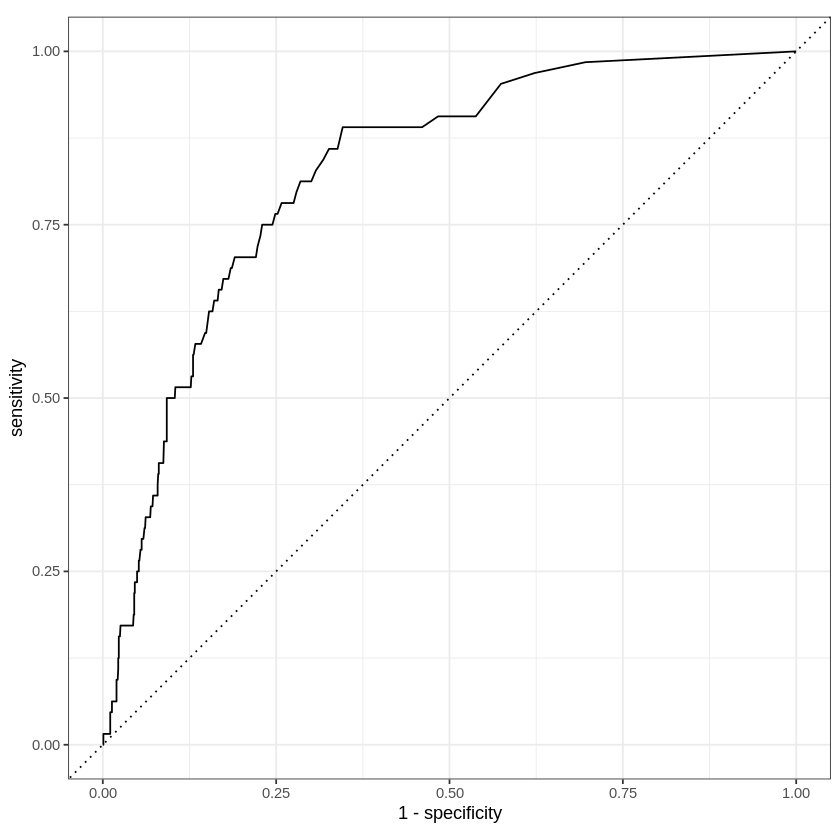

In [25]:
# ROC AUC
roc_auc_result <- rf_preds %>%
  roc_auc(truth = stroke, .pred_1, event_level = "second")

roc_curve_data <- rf_preds %>%
  roc_curve(truth = stroke, .pred_1, event_level = "second")

roc_plot <- autoplot(roc_curve_data)

# Show plot
print(roc_plot)